IPython notebooks require the following sort of magic command to display graphics via matplotlib. One usually puts this at the top of one's worksheet. You can omit this (or simply skip running this cell during a runtime session) if you don't need graphics.

In [0]:
%matplotlib inline

The code Simmons is going to run below uses DUlib. This installs the latest version released on Github. Alternatively, you might want just `pip install DUlib`.

In [2]:
!pip install git+https://github.com/sj-simmons/DUlib.git@v0.9

  Cloning https://github.com/sj-simmons/DUlib.git (to revision v0.9) to /tmp/pip-req-build-hc0i5mc_
  Running command git clone -q https://github.com/sj-simmons/DUlib.git /tmp/pip-req-build-hc0i5mc_
  Running command git checkout -q b7d3189db9efcba965e396ec6c09f2d2cb40acbb
  Created wheel for DUlib: filename=DUlib-0.9-cp36-none-any.whl size=91923 sha256=b70a18c23a6afaeb942c603ff10977e5a6d82bc11a6ae12ae7161c1ffefe4732
  Stored in directory: /tmp/pip-ephem-wheel-cache-6dxn9h3k/wheels/84/1e/bf/dac5d2f5812e6eb671ad21eaec3daf479ce0b7aa061f07c725
Successfully built DUlib


We only use the pycuda package to see exactly which flavor of gpu we are using. It is likely a Tesla T4 with 16GB of VRAM, so feel free to skip running this cell.

In [3]:
!pip install pycuda

     |████████████████████████████████| 1.6MB 3.4MB/s 
     |████████████████████████████████| 61kB 9.0MB/s 
     |████████████████████████████████| 471kB 62.7MB/s 
  Created wheel for pycuda: filename=pycuda-2019.1.2-cp36-cp36m-linux_x86_64.whl size=4535865 sha256=d9a31808884beba7d7c2aee7a59e549ce195dd5bd077d9afa53dc84c0f7c5c9b
  Stored in directory: /root/.cache/pip/wheels/a6/60/f0/b1c430c73d281ac3e46070480db50f7907364eb6f6d3188396
  Created wheel for pytools: filename=pytools-2020.1-py2.py3-none-any.whl size=59604 sha256=50bdbe3920d89e84c909c51ba63538a3efe9a767ad6ca12901bf9eb21d8aed52
  Stored in directory: /root/.cache/pip/wheels/6f/da/1b/946775a88291378182ed92c9800d6d0ebc2a554cb89829cc24
  Created wheel for mako: filename=Mako-1.1.1-cp36-none-any.whl size=75410 sha256=bc2947f4369847160a4768ee692a0b1d185ab6b86e339be0d5f2f447c6d0bb2f
  Stored in directory: /root/.cache/pip/wheels/ff/50/a9/0ddeed8679a1fb65bf4677cb9c92701828b2c1821e22ef72fd
Successfully built pycuda pytools mako


The next code block requires pycuda.

In [4]:
from du.utils import print_devices
print_devices()

number of available (CPU) threads: 1
CUDA is available:
  ID of default device is: 0
  Name of default device is: Tesla T4
1 CUDA device(s) found:
  1) Tesla T4 (Id: 0)
     Memory: 15.81 GB



Next, we upload a file that holds the code we want to run. (This requires that you allow third party cookies.)

In [5]:
from google.colab import files
uploaded = files.upload()

Saving mnist to mnist


Check if mnist got uploaded:

In [6]:
%ls

mnist  sample_data/


Run the program. This trains and tests a convolutional model on MNIST data.

training on 50000 of 60000 examples
training on cuda:0 (data on cpu:0); validating on cuda:0
ConvFFNet(
  (conv): Sequential(
    (0): Sequential(
      (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
      (1): ReLU()
      (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
  )
  (dense): Sequential(
    (0): Linear(in_features=3136, out_features=10, bias=True)
    (act0): ReLU()
    (lin1): Linear(in_features=10, out_features=10, bias=True)
  )
)
learning rate: 0.001, momentum: 0.92, batchsize: 20
epoch 1/15; loss 0.376162  
epoch 2/15; loss 0.134022  
epoch 3/15; loss 0.100519  
epoch 4/15; loss 0.0825242 
epoch 5/15; loss 0.074233  
epoch 6/15; loss 0.0641447 
epoch 7/15; loss 0.0597904 
epoch 8/15; loss 0.0524439 
epoch 9/15; loss 0.0473694 
epoch 10/15; loss 0.0442696 
epoch 11/15; loss 0.0372224 
epoch 12/15; loss 0.0376765 
epoch 13/15; loss 0.033366  
epoch 14/15; loss 0.0332411 
epoch 15/15; loss 0.0283785 
trained in 1

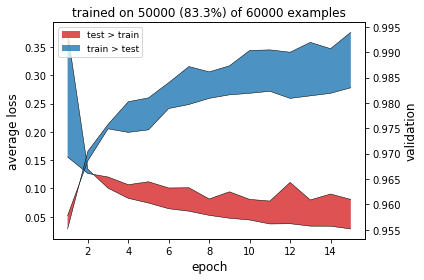

99.39% correct on training data
On test data:
98.30% correct, overall.


<Figure size 432x288 with 0 Axes>

In [8]:
%run mnist -graph 1 -verb 3

We see above that, with the overhead of evaluating on test data and graphing, training took just over 3 minutes. For comparison, let us train with no graphing (which leads to any test data being ignored during training).

In [10]:
%run mnist 

training on 50000 of 60000 examples
training on cuda:0 (data on cpu:0)
learning rate: 0.001, momentum: 0.92, batchsize: 20
epoch 1/15; loss 0.383164  
epoch 2/15; loss 0.135237  
epoch 3/15; loss 0.095811  
epoch 4/15; loss 0.0769801 
epoch 5/15; loss 0.0653551 
epoch 6/15; loss 0.0573155 
epoch 7/15; loss 0.0510274 
epoch 8/15; loss 0.0442954 
epoch 9/15; loss 0.0405175 
epoch 10/15; loss 0.0402954 
epoch 11/15; loss 0.0384181 
epoch 12/15; loss 0.0309513 
epoch 13/15; loss 0.0326119 
epoch 14/15; loss 0.0295156 
epoch 15/15; loss 0.0322866 
trained in 68.66 secs
99.37% correct on training data
On test data:
98.14% correct, overall.
